### Regarding the issue of loneliness, what do you think the company, leaders and everyone can do?



In [18]:
import pandas as pd

data = pd.read_csv("/Users/jessicaparker/Desktop/Data/Chinese_NLP_Project/lonely_comments.csv")

In [19]:
data = data["Answer"].str.strip()


In [20]:
filteredList = list(filter(lambda x : len(x) > 4 , data))

In [21]:
clean_list = []

for i in filteredList:
    if "好"  in i:
        pass
    elif "122333" in i:
        pass
    else:
        clean_list.append(i)
        
        

In [22]:
punctuation = "!@#$%^&*()_+<>?:.,;。！"  # add whatever you want


for i in clean_list:
    if i in punctuation:
        clean_list = clean_list.replace(i, "")



In [25]:
clean_list = pd.DataFrame(clean_list)

In [26]:
clean_list.to_csv("/Users/jessicaparker/Desktop/Data/Chinese_NLP_Project/chinese_sentences4.csv")

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(clean_list[0])

data_vectorized = vectorizer.transform(clean_list[0])

lda_model = LatentDirichletAllocation(n_components=1).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)


Topic 0:
[('多些关心', 2.3557814712571417), ('互相帮助', 2.2240683556983267), ('多方面与一线员工沟通', 1.9999999999999443), ('多些理解少点套路', 1.9999999999999443), ('多交流互动', 1.9999999999999443), ('多关心员工', 1.9999999999999443), ('多去关心员工在工作中遇到的问题', 1.9999999999999443), ('多听听一线工作者的心声', 1.9999999999999443), ('多和一线员工沟通', 1.9999999999999443), ('多增加集体活动', 1.9999999999999443)]


In [7]:
clean_list = pd.DataFrame(clean_list)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [9]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

[f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]
matplotlib.rcParams['font.family'] = ['Heiti TC']


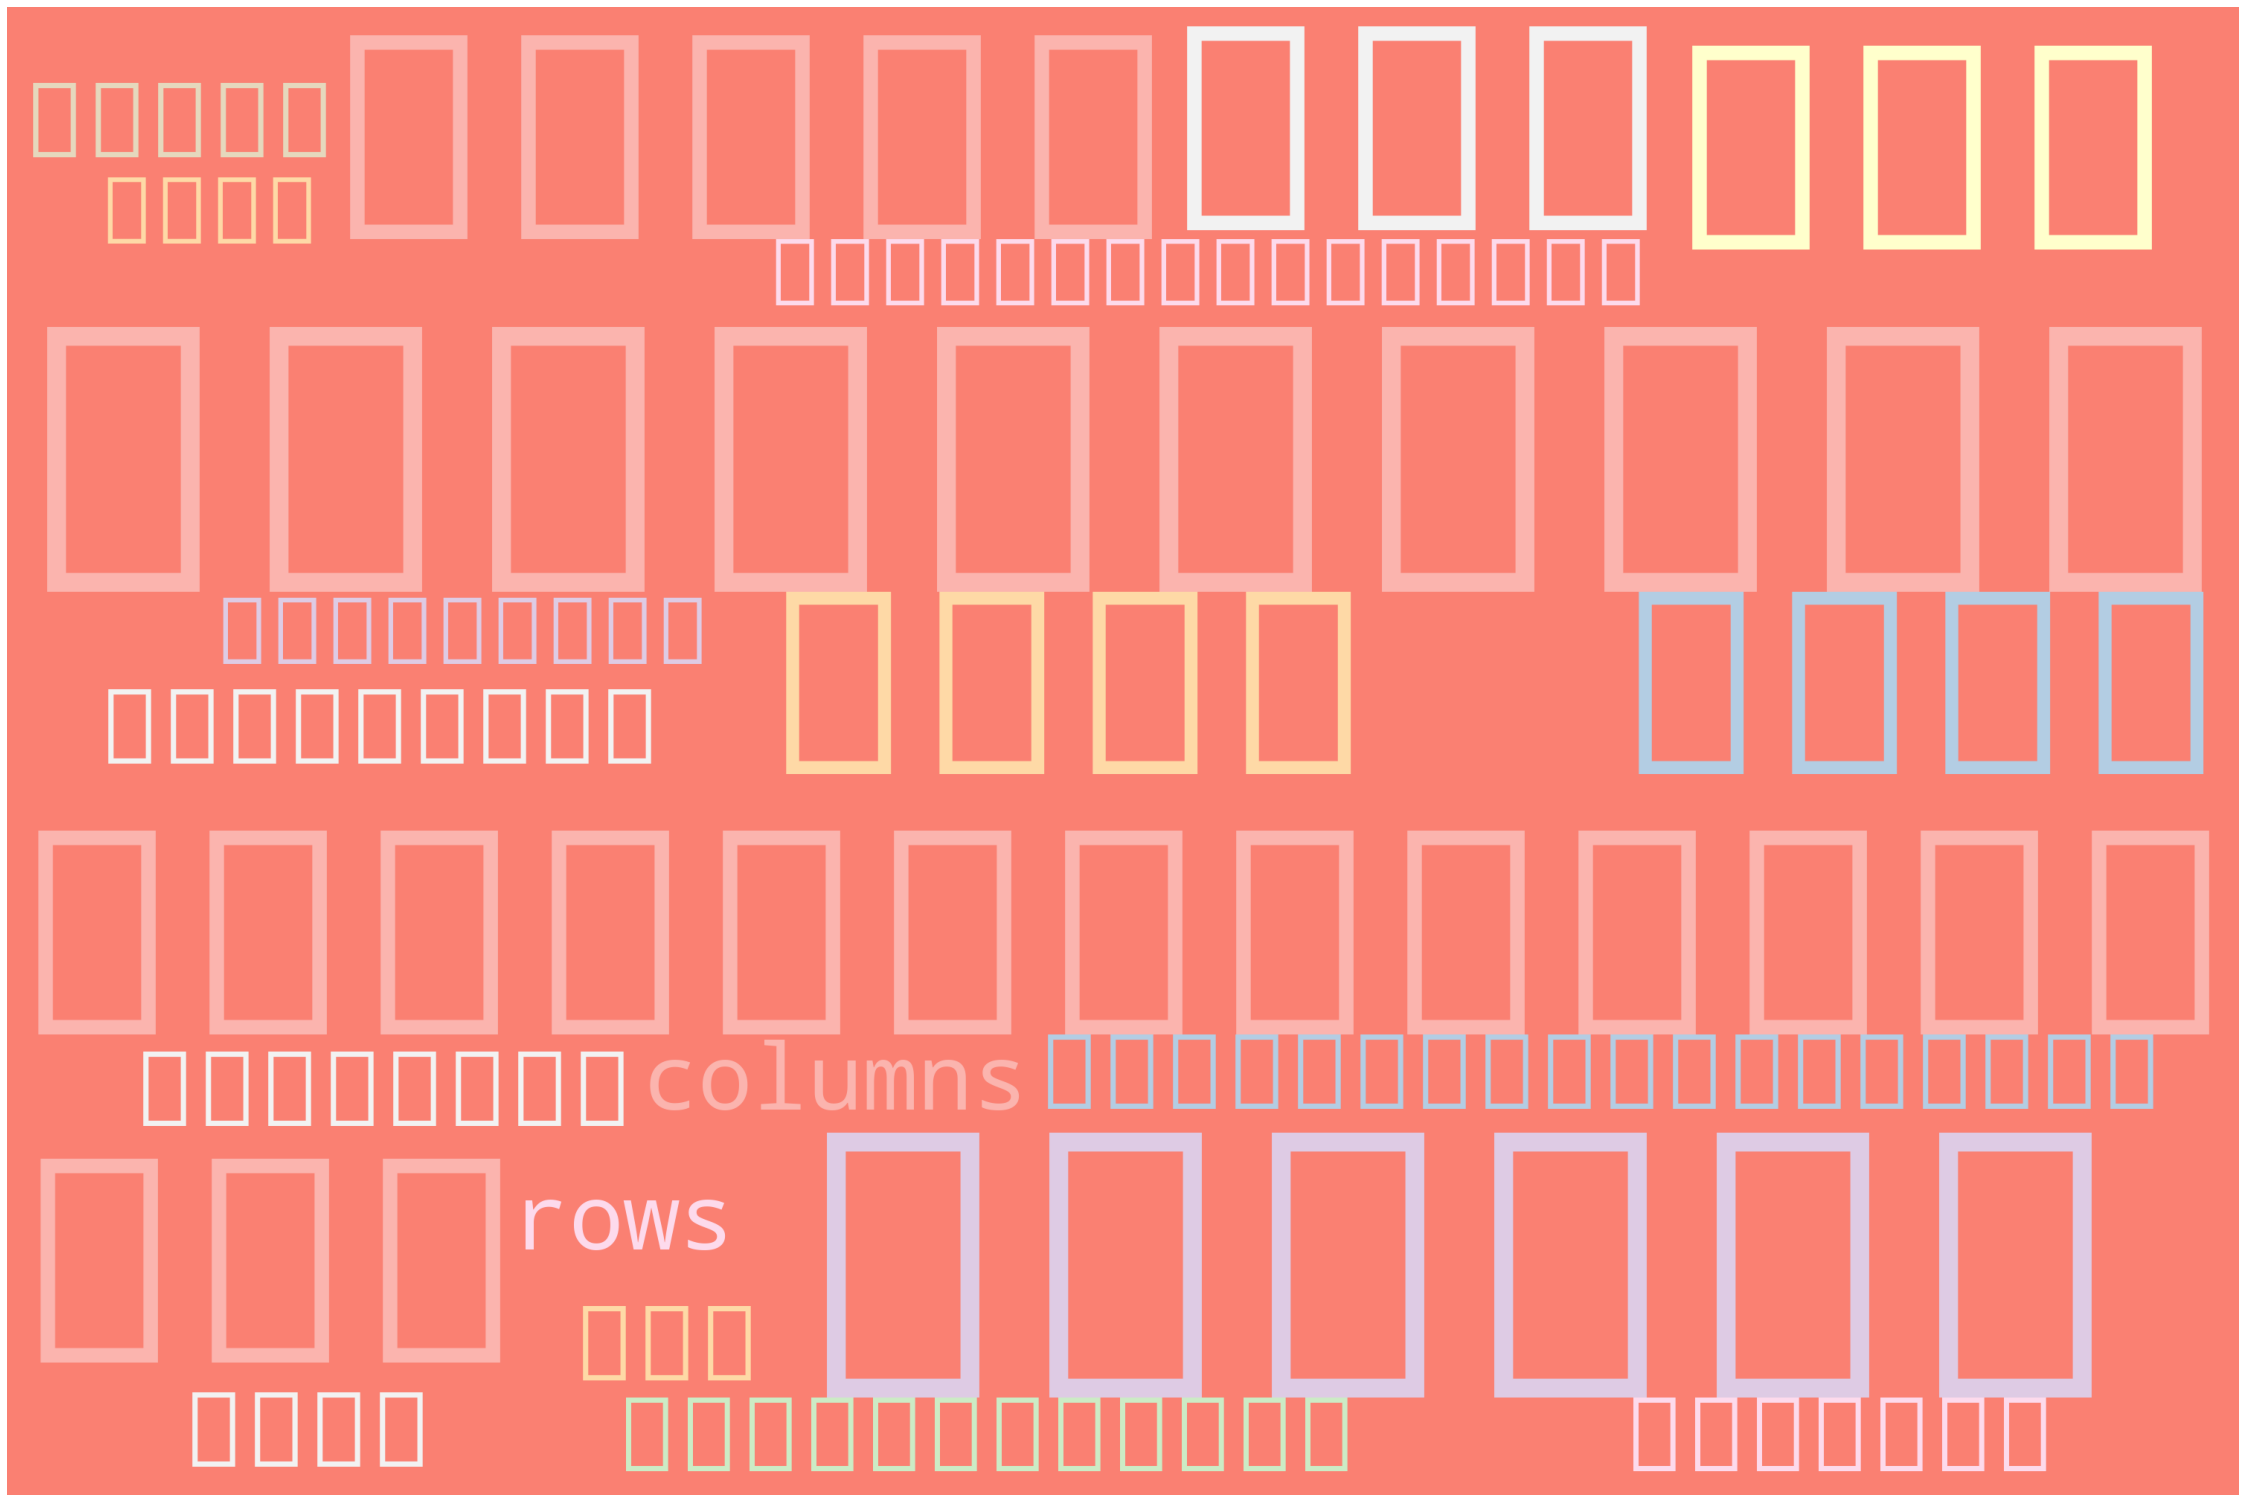

In [10]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(str(clean_list))
# Plot
                                                                                                                                               
plot_cloud(wordcloud)